In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as  sns
sns.set_theme()

In [ ]:
files_details = [
              {'name': 'LRoom', 'receiver': 'LRoom_receiver.json', 'transmiter': 'LRoom_transmiter.json'},
              {'name': 'BoxLectureRoom', 'receiver': 'BoxLectureRoom_receiver.json', 'transmiter': 'BoxLectureRoom_transmiter.json'},
              # {'name': 'LectureRoom', 'receiver': 'LectureRoom_receiver.json', 'transmiter': 'LectureRoom_transmiter.json'},
              {'name': 'ParkingLot', 'receiver': 'ParkingLot_receiver.json', 'transmiter': 'ParkingLot_transmiter.json'},
              ]

In [ ]:
def plotting(ax, x, y, title, xlabel, ylabel):
  ax.plot(x, y)
  ax.xaxis.label.set_size(14)
  ax.yaxis.label.set_size(14)
  ax.set_title(title, pad=3.0)
  ax.set(xlabel=xlabel, ylabel=ylabel)

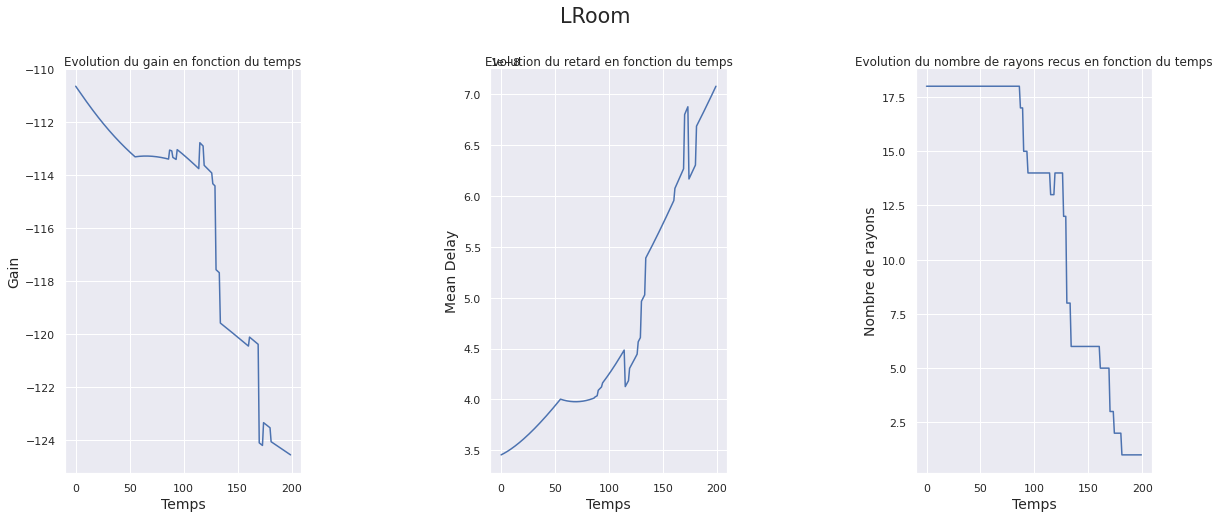

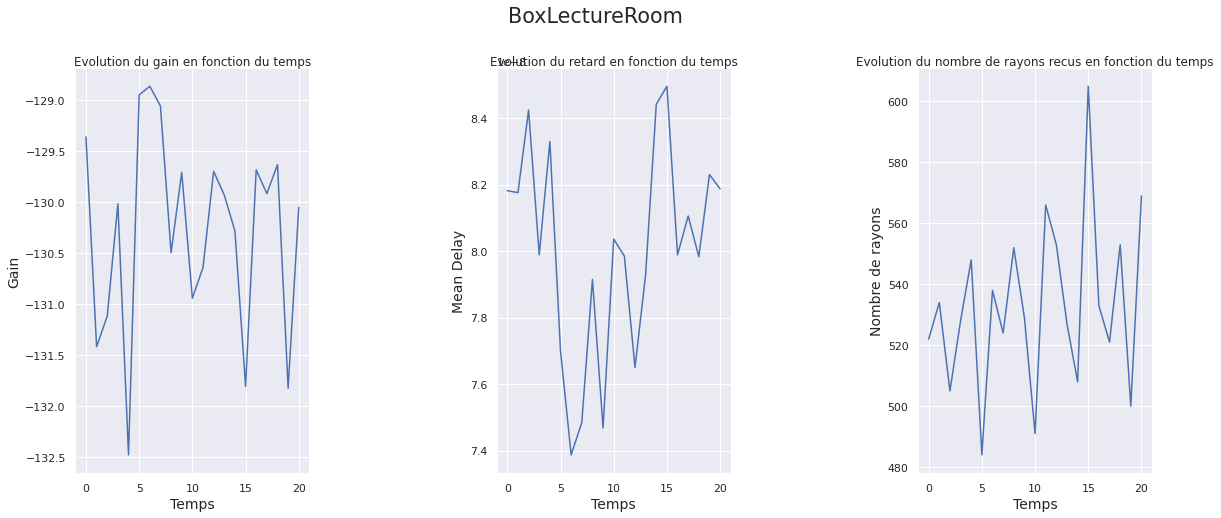

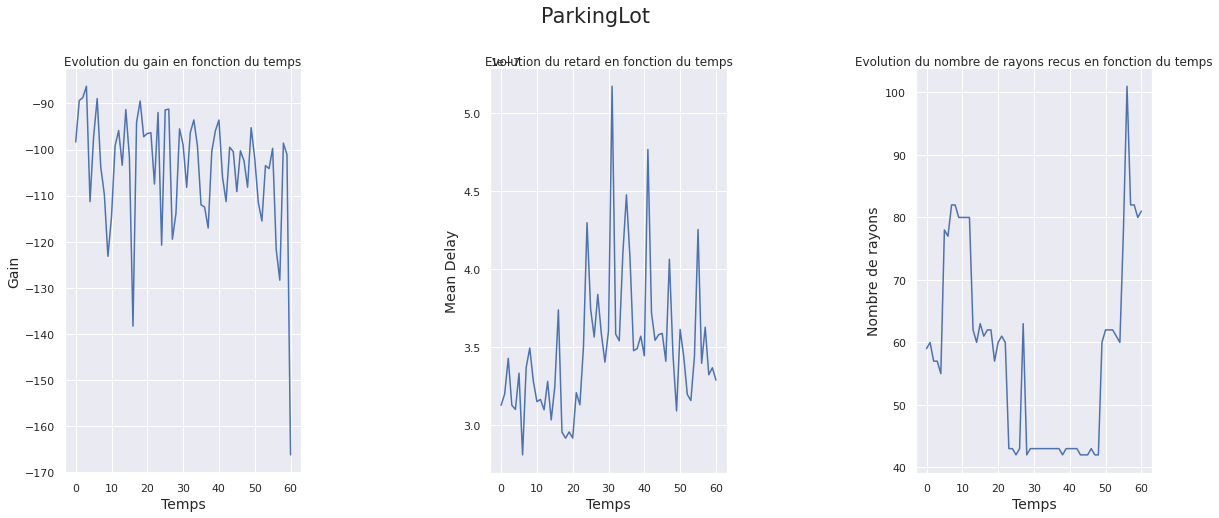

In [ ]:
for obj in files_details:
  name = obj['name']
  qd_receiver = pd.read_json(obj['receiver'])
  qd_transmitter = pd.read_json(obj['transmiter'])
  qd_transmitter['Nb_BEAM'] = qd_transmitter.apply (lambda row: len(row['Delay']), axis=1)
  qd_transmitter['Nb_BEAM']
  qd_transmitter['Nb_BEAM'].value_counts()
  qd_transmitter['Mean_Delay'] = qd_transmitter.apply (lambda row: (1/len(row['Delay'])) * sum(row['Delay']), axis=1)
  qd_transmitter['Mean_Delay']
  qd_transmitter['Mean_Gain'] = qd_transmitter.apply (lambda row: (1/len(row['Gain'])) * sum(row['Gain']), axis=1)
  qd_transmitter['Mean_Gain']
  fig, ax = plt.subplots(1,3, figsize=(18, 8))
  fig.suptitle(name, fontsize= 'xx-large')
  plotting(ax[0], range(len(qd_transmitter['Mean_Gain'])), qd_transmitter['Mean_Gain'], 'Evolution du gain en fonction du temps','Temps','Gain')
  plotting(ax[1], range(len(qd_transmitter['Mean_Delay'])), qd_transmitter['Mean_Delay'],'Evolution du retard en fonction du temps','Temps','Mean Delay')
  plotting(ax[2], range(len(qd_transmitter['Nb_BEAM'])), qd_transmitter['Nb_BEAM'],'Evolution du nombre de rayons recus en fonction du temps','Temps','Nombre de rayons')
  fig.tight_layout(pad=5.0)
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)

